In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Fix the path construction - use forward slashes or raw strings
import os

# Method 1: Use forward slashes (recommended)
path = os.path.abspath(os.path.join("..", "04_S&P500_quant_analysis", "01_data", "S&P500_D_1789-05-01_2025-09-17.csv"))

# Alternative Method 2: Use raw string
# path = os.path.abspath(os.path.join("..", r"04_S&P500_quant_analysis\01_data", "S&P500_D_1789-05-01_2025-09-17.csv"))

# Alternative Method 3: Use pathlib (modern approach)
# from pathlib import Path
# path = Path("..") / "04_S&P500_quant_analysis" / "01_data" / "S&P500_D_1789-05-01_2025-09-17.csv"

# print(f"Path exists: {os.path.exists(path)}")

# Read the CSV file
df = pd.read_csv(path)

# lower case column names for easier access
df.columns = [col.lower() for col in df.columns]

# Set the 'date' column as the index and convert it to datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Show the first few rows of the dataframe
df.head()

,open,high,low,close,volume
date,,,,,
1789-05-01,0.51,0.51,0.51,0.51,0.0
1789-06-01,0.51,0.51,0.51,0.51,0.0
1789-07-01,0.50,0.50,0.50,0.50,0.0
1789-08-01,0.50,0.51,0.50,0.51,0.0
1789-09-01,0.51,0.51,0.50,0.51,0.0


In [27]:
# Calculate simple returns with pct_change()
df['simple_returns'] = df['close'].pct_change()

# Drop NA values that result from pct_change()
df.dropna(inplace=True)

# Show dataframe
df.head()

,open,high,low,close,volume,simple_returns
date,,,,,,
1789-06-01,0.51,0.51,0.51,0.51,0.0,0.000000
1789-07-01,0.50,0.50,0.50,0.50,0.0,-0.019608
1789-08-01,0.50,0.51,0.50,0.51,0.0,0.020000
1789-09-01,0.51,0.51,0.50,0.51,0.0,0.000000
1789-10-01,0.51,0.51,0.51,0.51,0.0,0.000000


In [28]:
# resample to monthly frequency, taking the last observation of each month for OHLCV
monthly_ohlcv = df.resample('M').agg({
    'open': 'last',
    'high': 'last',
    'low': 'last',
    'close': 'last',
    'volume': 'last'
})

# simple_returns for monthly data
monthly_ohlcv['monthly_returns'] = monthly_ohlcv['close'].pct_change()

# Drop NA values that result from pct_change()
monthly_ohlcv.dropna(inplace=True)

# Show dataframe
monthly_ohlcv.head()

,open,high,low,close,volume,monthly_returns
date,,,,,,
1789-07-31,0.50,0.50,0.50,0.50,0.0,-0.019608
1789-08-31,0.50,0.51,0.50,0.51,0.0,0.020000
1789-09-30,0.51,0.51,0.50,0.51,0.0,0.000000
1789-10-31,0.51,0.51,0.51,0.51,0.0,0.000000
1789-11-30,0.51,0.51,0.50,0.50,0.0,-0.019608


In [29]:
# Calculate log returns (Monthly) for all data
log_returns = (1 + monthly_ohlcv['monthly_returns']).apply(np.log)

# Cumulative sum of log returns (correct for compounding)
cumsum_log = log_returns.cumsum()

In [30]:
# # Filter cumulative log returns from 2020 onwards
# cumsum_log_2020 = cumsum_log[cumsum_log.index >= '2020-01-01']

# # Plot cumulative log returns from 2020
# plt.figure(figsize=(14, 7))
# plt.plot(cumsum_log_2020, label='Cumulative Sum (Log Returns) from 2020', color='blue')
# plt.title('Cumulative Log Returns (Monthly) - From 2020')
# plt.xlabel('Date')
# plt.ylabel('Cumulative Log Returns')
# plt.legend()
# plt.grid()
# plt.show()

In [31]:
# add year column from DatetimeIndex
monthly_ohlcv['year'] = monthly_ohlcv.index.year

# add month column from DatetimeIndex
monthly_ohlcv['month'] = monthly_ohlcv.index.month

# add day column from DatetimeIndex
monthly_ohlcv['day'] = monthly_ohlcv.index.day

monthly_ohlcv.head()

,open,high,low,close,volume,monthly_returns,year,month,day
date,,,,,,,,,
1789-07-31,0.50,0.50,0.50,0.50,0.0,-0.019608,1789,7,31
1789-08-31,0.50,0.51,0.50,0.51,0.0,0.020000,1789,8,31
1789-09-30,0.51,0.51,0.50,0.51,0.0,0.000000,1789,9,30
1789-10-31,0.51,0.51,0.51,0.51,0.0,0.000000,1789,10,31
1789-11-30,0.51,0.51,0.50,0.50,0.0,-0.019608,1789,11,30


In [32]:
# Select month for the analysis
# M = 1 # January
# M = 2 # February
# M = 3 # March
# M = 4 # April
# M = 5 # May
# M = 6 # June
# M = 7 # July
# M = 8 # August
M = 9  # September
# M = 10 # October
# M = 11 # November
# M = 12 # December

In [33]:
df_ = monthly_ohlcv.copy()

# select only rows where month == M
df_ = df_[df_.month == M]

# count positive months (where monthly_returns > 0)
positive_months = len(df_[df_['monthly_returns'] > 0])
print(f"Number of positive months in month {M}: {positive_months}")

# count months (length of df)
months_count = len(df_)
print(f"Number of months in the dataset for month {M}: {months_count}")

# percentage of positive months
positive_percentage = (positive_months / months_count) * 100
print(f"Percentage of positive months in month {M}: {positive_percentage:.2f}%")

Number of positive months in month 9: 109
Number of months in the dataset for month 9: 236
Percentage of positive months in month 9: 46.19%


In [34]:
# def get_positive_months(monthly_ohlcv, M):
#     df_ = monthly_ohlcv.copy()
#     df_ = df_[df_.month == M]
#     positive_months = df_[df_['monthly_returns'] > 0]['year'].tolist()
#     return positive_months

# function that return monthly_ohlcv.year where month == M and monthly_returns > 0
def get_positive_years(monthly_ohlcv, M):
    df_ = monthly_ohlcv.copy()
    df_ = df_[df_.month == M]
    positive_years = df_[df_['monthly_returns'] > 0]['year'].tolist()
    return positive_years

# Example usage
positive_years = get_positive_years(monthly_ohlcv, M)
print(f"Years with positive returns in month {M}: {positive_years}")

print(f"Number of years with positive returns in month {M}: {len(positive_years)}")

Years with positive returns in month 9: [1790, 1791, 1794, 1798, 1800, 1802, 1804, 1807, 1808, 1809, 1814, 1815, 1817, 1820, 1822, 1823, 1827, 1829, 1830, 1832, 1834, 1838, 1840, 1842, 1843, 1845, 1850, 1852, 1856, 1860, 1861, 1862, 1863, 1865, 1866, 1867, 1868, 1874, 1877, 1878, 1879, 1880, 1882, 1885, 1886, 1887, 1888, 1889, 1891, 1893, 1896, 1904, 1905, 1906, 1909, 1910, 1912, 1915, 1916, 1918, 1919, 1920, 1921, 1925, 1927, 1928, 1935, 1936, 1938, 1939, 1940, 1942, 1943, 1945, 1949, 1950, 1953, 1954, 1955, 1958, 1964, 1965, 1967, 1968, 1970, 1973, 1976, 1980, 1982, 1983, 1988, 1992, 1995, 1996, 1997, 1998, 2004, 2005, 2006, 2007, 2009, 2010, 2012, 2013, 2017, 2018, 2019, 2024, 2025]
Number of years with positive returns in month 9: 109


In [35]:
# function that for every year in positive_years, calculate the Cumulative Sum (Log Returns) after 30, 60, 90 days
def get_cumsum_log_after_days(positive_years, df_daily, days=30):
    """
    Calculate cumulative log returns after specified number of days
    from the end of the positive month for each year.
    
    Args:
        positive_years: List of years with positive returns in month M
        df_daily: Daily dataframe with simple_returns column
        days: Number of days to look ahead (30, 60, or 90)
    
    Returns:
        Dictionary with year as key and cumulative log return as value
    """
    cumsum_logs = {}
    
    for year in positive_years:
        try:
            # Find the last day of month M in the given year
            month_end_date = pd.Timestamp(year=year, month=M, day=1) + pd.offsets.MonthEnd(0)
            
            # Find the date that is 'days' after the month end
            target_date = month_end_date + pd.Timedelta(days=days)
            
            # Get data from month end to target date
            mask = (df_daily.index > month_end_date) & (df_daily.index <= target_date)
            period_data = df_daily.loc[mask]
            
            if not period_data.empty:
                # Calculate log returns for the period
                log_returns_period = (1 + period_data['simple_returns']).apply(np.log)
                # Sum log returns (equivalent to cumulative multiplication of (1+r))
                cumsum_log_value = log_returns_period.sum()
                cumsum_logs[year] = cumsum_log_value
            else:
                # If no data available for that period, skip
                print(f"No data available for {year} after {days} days from month {M}")
                
        except Exception as e:
            print(f"Error processing year {year}: {e}")
            continue
    
    return cumsum_logs

# Use the original daily dataframe instead of monthly
cumsum_30_days = get_cumsum_log_after_days(positive_years, df, days=30)
cumsum_60_days = get_cumsum_log_after_days(positive_years, df, days=60)
cumsum_90_days = get_cumsum_log_after_days(positive_years, df, days=90)

print(f"Cumulative Sum (Log Returns) after 30 days for years with positive returns in month {M}:")
for year, ret in cumsum_30_days.items():
    print(f"{year}: {ret*100:.2f}%")

print(f"\nCumulative Sum (Log Returns) after 60 days for years with positive returns in month {M}:")
for year, ret in cumsum_60_days.items():
    print(f"{year}: {ret*100:.2f}%")

print(f"\nCumulative Sum (Log Returns) after 90 days for years with positive returns in month {M}:")
for year, ret in cumsum_90_days.items():
    print(f"{year}: {ret*100:.2f}%")

No data available for 2025 after 30 days from month 9
No data available for 2025 after 60 days from month 9
No data available for 2025 after 90 days from month 9
Cumulative Sum (Log Returns) after 30 days for years with positive returns in month 9:
1790: 1.80%
1791: 0.00%
1794: 0.00%
1798: 1.48%
1800: 1.00%
1802: 1.57%
1804: 1.87%
1807: -4.26%
1808: 3.55%
1809: 1.72%
1814: 1.39%
1815: 0.64%
1817: 1.83%
1820: 1.59%
1822: -0.50%
1823: 0.48%
1827: 0.48%
1829: 1.50%
1830: 0.00%
1832: 2.49%
1834: 2.10%
1838: -0.90%
1840: 0.58%
1842: 0.00%
1843: 8.54%
1845: 0.90%
1850: 1.43%
1852: 2.03%
1856: 1.15%
1860: -1.40%
1861: 1.96%
1862: 0.35%
1863: 0.68%
1865: 2.35%
1866: 1.52%
1867: 2.19%
1868: -0.78%
1874: 0.21%
1877: 1.27%
1878: 0.28%
1879: 1.08%
1880: 3.46%
1882: 0.80%
1885: 10.49%
1886: 2.24%
1887: -4.63%
1888: -2.53%
1889: -2.04%
1891: -0.35%
1893: 7.91%
1896: 4.63%
1904: 7.11%
1905: -0.20%
1906: -2.16%
1909: -1.50%
1910: 3.25%
1912: -3.53%
1915: 7.45%
1916: 0.63%
1918: 0.79%
1919: 2.78%
1920:

In [36]:
# count how many of the eoy_returns are positive
positive_eoy_count = sum(1 for ret in eoy_returns.values() if ret > 0)
print(f"Number of years with positive End Of Year returns: {positive_eoy_count} out of {len(eoy_returns)}")

# calculate the percentage of positive eoy_returns
positive_eoy_percentage = (positive_eoy_count / len(eoy_returns)) * 100
print(f"Percentage of years with positive End Of Year returns: {positive_eoy_percentage:.2f}%")

NameError: name 'eoy_returns' is not defined

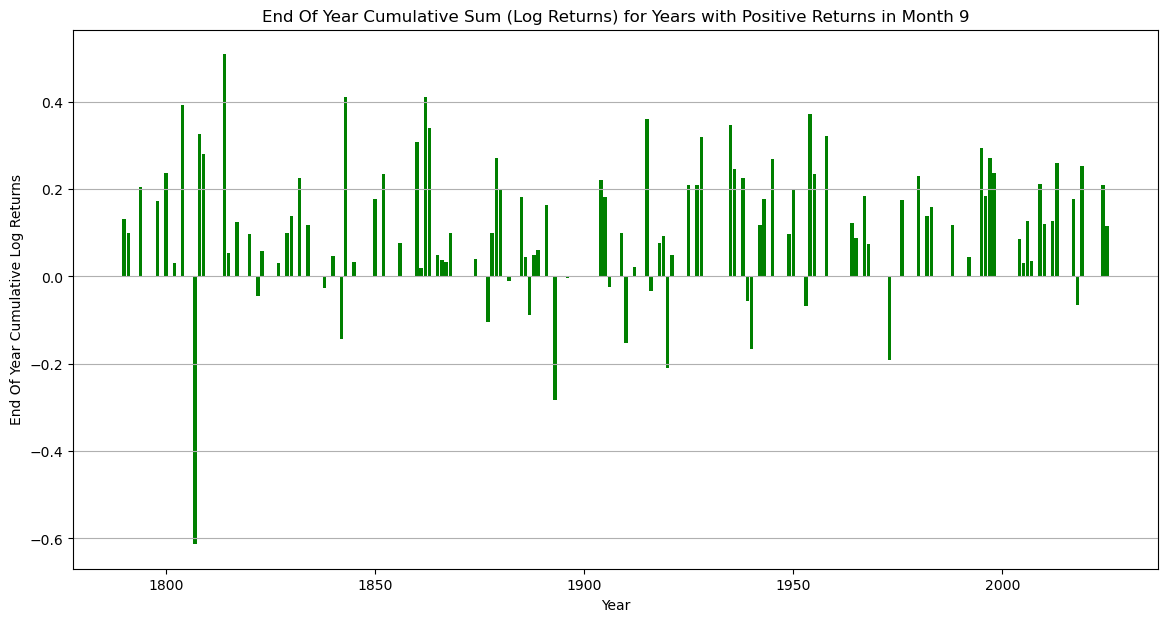

In [ ]:
# Plotting the End Of Year Cumulative Sum (Log Returns) for years with positive returns in month M
years = list(eoy_returns.keys())
returns = list(eoy_returns.values())
plt.figure(figsize=(14, 7))
plt.bar(years, returns, color='green')
plt.title(f'End Of Year Cumulative Sum (Log Returns) for Years with Positive Returns in Month {M}')
plt.xlabel('Year')
plt.ylabel('End Of Year Cumulative Log Returns')
plt.grid(axis='y')
plt.show()

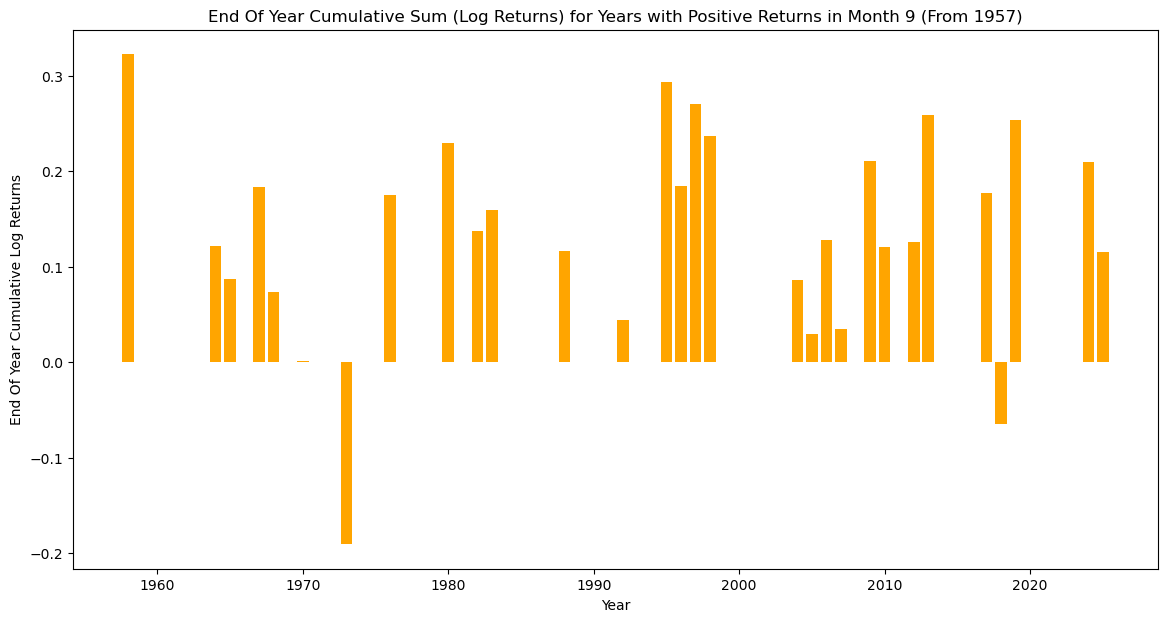

In [ ]:
# plot of the years > 1957
years = list(eoy_returns.keys())
years = [year for year in years if year >= 1957]
returns = [eoy_returns[year] for year in years]

plt.figure(figsize=(14, 7))
plt.bar(years, returns, color='orange')
plt.title(f'End Of Year Cumulative Sum (Log Returns) for Years with Positive Returns in Month {M} (From 1957)')
plt.xlabel('Year')
plt.ylabel('End Of Year Cumulative Log Returns')
plt.show()

## Analysis Summary

This analysis examined the relationship between positive September returns and end-of-year performance for the S&P 500 index.

### Key Findings:

1. **Historical Pattern**: We identified all years where September showed positive monthly returns
2. **End-of-Year Performance**: For each of these years, we calculated the cumulative log returns through the end of the year
3. **Notable Exceptions**: Out of all years with positive September returns, only **two cases** resulted in negative year-end performance:
   - **1973**: Despite a positive September, the year closed with negative returns
   - **2018**: Despite a positive September, the year closed with negative returns

### Conclusion:

The analysis reveals that positive September performance is generally a strong indicator of positive year-end returns, with only 2 exceptions (1973 and 2018) in the entire historical dataset since 1957. This suggests a strong seasonal pattern where positive September momentum tends to carry through to year-end.